<a href="https://colab.research.google.com/github/Soham1605/NBARookieContractManager/blob/main/NBA_Rookie_Contract_Manager_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving nbaplayersdraft.csv to nbaplayersdraft.csv


In [ ]:
import pandas as pd
df = pd.read_csv('nbaplayersdraft.csv')
df.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [ ]:
#From the previous notebook, these are the predicted HOFers/All-star caliber players
HallofFamers=['Charles Smith', 'Kevin McHale', 'Buck Williams', 'Herb Williams', 'Isiah Thomas',
              'Jeff Ruland', 'Kelly Tripucka', 'Steve Johnson', 'Dominique Wilkins', 'James Worthy',
              'Mark Eaton', 'Clyde Drexler', 'Darrell Walker', 'Ennis Whatley', 'Ralph Sampson',
              'Antoine Carr', 'Charles Barkley', 'Hakeem Olajuwon', 'John Stockton', 'Michael Jordan',
              'Sam Bowie', 'Chris Mullin', 'Joe Dumars', 'Karl Malone', 'Manute Bol', 'Patrick Ewing',
              'Xavier McDaniel', 'Dennis Rodman', 'Hot Rod Williams', 'Reggie Miller', 'Scottie Pippen',
              'Chris Morris', 'Gary Grant', 'Grant Long', 'Mitch Richmond', 'Rik Smits', 'Willie Anderson',
              'David Robinson', 'Sherman Douglas', 'Tim Hardaway', 'Vlade Divac', 'Gary Payton', 'Bison Dele',
              'Dikembe Mutombo', 'Alonzo Mourning', "Shaquille O'Neal", 'Chris Webber', 'Shawn Bradley',
              'Toni Kukoc', 'Glenn Robinson', 'Grant Hill', 'Jason Kidd', 'Arvydas Sabonis', 'Damon Stoudamire',
              'Jerry Stackhouse', 'Joe Smith', 'Kevin Garnett', 'Allen Iverson', 'Kobe Bryant', 'Marcus Camby',
              'Ray Allen', 'Steve Nash', 'Chauncey Billups', 'Michael Stewart', 'Tim Duncan', 'Tracy McGrady',
              'Dirk Nowitzki', 'Paul Pierce', 'Vince Carter', 'Steve Francis', 'Pau Gasol', 'Tony Parker', 'Yao Ming',
              'Chris Bosh', 'Dwyane Wade', 'Dwight Howard', 'Bobby Jones', 'Russell Westbrook']

#Adding a column called HOF where 1 indicates HOFer and 0 indicates non-HOFer
#HOF=1 for the players that fall under the HallofFamers list shown above
df['HOF'] = df['player'].apply(lambda x: 1 if x in HallofFamers else 0)
#printing to confirm that a column has been added and a HOFer, eg RusselL Westbrook has HOF=1
print(df[df['player'] == 'Russell Westbrook'])
print(df)


        id  year  rank  overall_pick team             player college  \
1085  1086  2008     4             4  SEA  Russell Westbrook    UCLA   

      years_active   games  minutes_played  ...  free_throw_percentage  \
1085          14.0  1021.0         35426.0  ...                  0.783   

      average_minutes_played  points_per_game  average_total_rebounds  \
1085                    34.7             22.8                     7.4   

      average_assists  win_shares  win_shares_per_48_minutes  box_plus_minus  \
1085              8.4       106.5                      0.144             4.3   

      value_over_replacement  HOF  
1085                    55.8    1  

[1 rows x 25 columns]
        id  year  rank  overall_pick team                player  \
0        1  1989     1             1  SAC        Pervis Ellison   
1        2  1989     2             2  LAC           Danny Ferry   
2        3  1989     3             3  SAS          Sean Elliott   
3        4  1989     4             

In [ ]:
#Removing rows with empty column data
df_cleaned=df.dropna()

#Let us see how many HOFers and non-HOFers are there
print('Number of HOFers')
print(df_cleaned[df_cleaned['HOF'] == 1].shape[0])
print('Number of non-HOFers')
print(df_cleaned[df_cleaned['HOF'] == 0].shape[0])

Number of HOFers
30
Number of non-HOFers
1279


Due to availability of different datasets, one having to do with NBA draft classes and another having to do with rookies in their rookie year, there is loss of positive instances (HOF=1) but that is alright because that's why we increased these instances in the previous notebook

In [ ]:
#Splitting dataset into two - our most recent HOFer in the list in Russell Westbrook, who was inducted in 2008
#So we will split it at 2008 - first half will be used for testing and training, second half will be used to predict
#which of these rookies could have HOF potential

rookies_pre_2008 = df_cleaned[df_cleaned['year'] <= 2008.0]
rookies_post_2008 = df_cleaned[df_cleaned['year'] > 2008.0].copy()
rookies_post_2008.head()


,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,HOF
1142,1143,2009,1,1,LAC,Blake Griffin,Oklahoma,12.0,724.0,23815.0,...,0.696,32.9,19.8,8.2,4.1,79.3,0.160,3.4,32.5,0
1144,1145,2009,3,3,OKC,James Harden,Arizona State,13.0,942.0,32617.0,...,0.860,34.6,24.9,5.6,6.8,149.6,0.220,6.8,72.0,0
1145,1146,2009,4,4,SAC,Tyreke Evans,Memphis,10.0,594.0,18242.0,...,0.757,30.7,15.7,4.6,4.8,28.4,0.075,0.8,13.1,0
1147,1148,2009,6,6,MIN,Jonny Flynn,Syracuse,3.0,163.0,3738.0,...,0.809,22.9,9.2,1.9,3.9,-1.1,-0.015,-4.0,-1.9,0
1148,1149,2009,7,7,GSW,Stephen Curry,Davidson,13.0,826.0,28361.0,...,0.908,34.3,24.3,4.6,6.5,120.2,0.203,6.5,60.9,0


In [ ]:
#Now we only work with rookies pre 2008
print('Number of HOFers')
print(rookies_pre_2008[rookies_pre_2008['HOF'] == 1].shape[0])
print('Number of non-HOFers')
print(rookies_pre_2008[rookies_pre_2008['HOF'] == 0].shape[0])

Number of HOFers
30
Number of non-HOFers
728


In [ ]:
#A good development- imbalance has reduced significantly, although it is still highly imbalanced
#Now let us use this data to predict HOF potential
#removing 'rank' becuase 'overall_pick' contains same info, removing 'id','year','player' for irrelevance, removing 'team', 'college' because that is beyond problem scope
X=rookies_pre_2008.drop(columns=['player', 'year', 'HOF','id','rank','team','college'])
y=rookies_pre_2008['HOF']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Addressing imbalance using smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Training base model random forest
#choosing random forest because it helps plotting parameter importance easily later
base_rf = RandomForestClassifier(random_state=42)
base_rf.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = base_rf.predict(X_test)
y_pred_proba = base_rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print("Base Random Forest Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))





Base Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       219
           1       0.11      0.11      0.11         9

    accuracy                           0.93       228
   macro avg       0.54      0.54      0.54       228
weighted avg       0.93      0.93      0.93       228

ROC-AUC: 0.7970573313039067


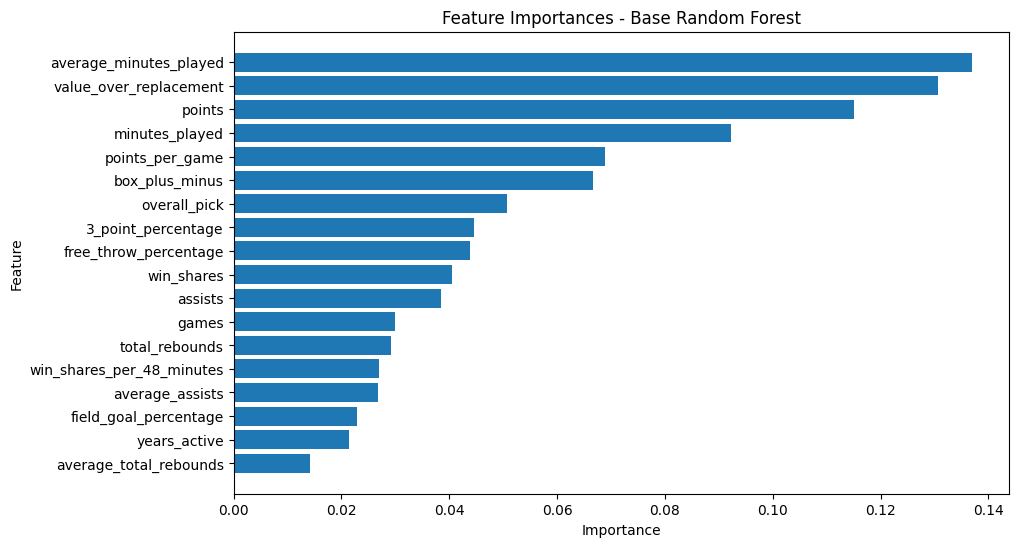

In [ ]:
import matplotlib.pyplot as plt

# Plotting Feature Importance
importances = base_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances - Base Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


We can see that features such as minutes played, points and VORP are the most important in determining HOF potential.

VORP=Value over replacement (how much more value do you provide when you are on court rather than when you are replaced)

We can see that efficiency and total rebounds really do not have much of an influence. This is because teams are resting on their stars and veterans to score efficiently and get rebounds, not on their rookies. Rookies are relied on to make high % 3 pointers when the ball is kicked out to them, and outscore the opposing teams bench.

The most important is minutes played, which is very intuitive because if you as a rookie are seeing on-court minutes, it means you are a good rookie.



In [ ]:
#Alright, let's implement boosting with random forest as our base estimator
from sklearn.ensemble import AdaBoostClassifier

# Boosting
boost_rf = AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                              n_estimators=50, learning_rate=1.0, random_state=42, algorithm='SAMME')

# Training the model
boost_rf.fit(X_train_resampled, y_train_resampled)
boost_rf.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred_boost = boost_rf.predict(X_test)
y_pred_boost_proba = boost_rf.predict_proba(X_test)[:, 1]

print("Boosted Random Forest Performance:")
print(classification_report(y_test, y_pred_boost))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_boost_proba))


Boosted Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       219
           1       0.11      0.11      0.11         9

    accuracy                           0.93       228
   macro avg       0.54      0.54      0.54       228
weighted avg       0.93      0.93      0.93       228

ROC-AUC: 0.5372907153729072


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Bagging
bagging_rf = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                n_estimators=50, random_state=42)
bagging_rf.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred_bag = bagging_rf.predict(X_test)
y_pred_bag_proba = bagging_rf.predict_proba(X_test)[:, 1]

print("Bagged Random Forest Performance:")
print(classification_report(y_test, y_pred_bag))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_bag_proba))


Bagged Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       219
           1       0.18      0.22      0.20         9

    accuracy                           0.93       228
   macro avg       0.57      0.59      0.58       228
weighted avg       0.94      0.93      0.93       228

ROC-AUC: 0.7947742262810756


We can see that random forest with applied bagging performs the best.
So we will use this model to predict on rookies_post_2008 data

In [ ]:
#Predicting on rookies post 2008
X_new = rookies_post_2008.drop(columns=['player', 'year', 'HOF', 'id', 'rank', 'team', 'college'])

rookies_post_2008.loc[:,'predicted HOF'] = bagging_rf.predict(X_new)
predicted_HOFers = rookies_post_2008[rookies_post_2008['predicted HOF'] == 1]
predicted_HOFers.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,HOF,predicted HOF
1142,1143,2009,1,1,LAC,Blake Griffin,Oklahoma,12.0,724.0,23815.0,...,32.9,19.8,8.2,4.1,79.3,0.160,3.4,32.5,0,1
1144,1145,2009,3,3,OKC,James Harden,Arizona State,13.0,942.0,32617.0,...,34.6,24.9,5.6,6.8,149.6,0.220,6.8,72.0,0,1
1148,1149,2009,7,7,GSW,Stephen Curry,Davidson,13.0,826.0,28361.0,...,34.3,24.3,4.6,6.5,120.2,0.203,6.5,60.9,0,1
1150,1151,2009,9,9,TOR,DeMar DeRozan,USC,13.0,957.0,32789.0,...,34.3,20.8,4.4,3.9,83.7,0.123,0.7,22.6,0,1
1186,1187,2009,45,45,MIN,Nick Calathes,Florida,2.0,129.0,2011.0,...,15.6,4.6,1.9,2.7,2.6,0.063,-0.5,0.8,0,1


In [ ]:
#Let us take all the players into a list for manual validation
predicted_HOFers_list = predicted_HOFers['player'].tolist()
print(predicted_HOFers_list)


['Blake Griffin', 'James Harden', 'Stephen Curry', 'DeMar DeRozan', 'Nick Calathes', 'Paul George', 'Anthony Davis', 'Damian Lillard', 'Terrence Jones', 'Andre Roberson', 'Julius Randle', 'Elfrid Payton', 'Jarrett Allen']


Time for manual real-time verification:


1.   First good sign is that number of potential HOFers is less, as it should be
2.   Let us verify that all these players were extended using data from NBA.com
3.   Blake Griffin, Steph Curry, James Harden, Paul George, Anthony Davis, DeMar DeRozan, Damian Lillard are all considered future HOFers, so our model has done a good job recognizing HOF potential.
4. Outlier- Nick Calathes was offered an extension but chose to play for Greece.
5. Andre Roberson did receive a contract extension and played multiple years although with low averages so the model must have seen trends that we as superficial analysts cannot.
6. Julius Randle, and Jarrett Allen have also been All-stars. In fact Jarrett Allen is a part of the best team in the NBA right now, the Cleveland Cavs- who are having an all time opening record of 17-1 as of now.

Problem: Our model predicts HOF potential correctly, but we cannot extend only a handful of rookies. Therefore we are going to have to be lineant with our model.





In [ ]:
rookies_post_2008['predicted stars'] = bagging_rf.predict_proba(X_new)[:,1]
threshold=0.2
rookies_post_2008['predicted star potential'] = (rookies_post_2008['predicted stars'] >= threshold).astype(int)
predicted_stars = rookies_post_2008[rookies_post_2008['predicted star potential'] == 1]
predicted_stars_rookies = rookies_post_2008[(rookies_post_2008['predicted star potential'] == 1) &
    (rookies_post_2008['years_active'] <= 4) &
    (rookies_post_2008['year'] > 2017)]


In [ ]:
predicted_stars_list=predicted_stars['player'].tolist()
predicted_stars_rookies_list=predicted_stars_rookies['player'].tolist()
print("These are current stars according to our model")
print(predicted_stars_list)
print("These are current(as of 2021) rookies that should be extended according to our model")
print(predicted_stars_rookies_list)

These are current stars according to our model
['Blake Griffin', 'James Harden', 'Tyreke Evans', 'Stephen Curry', 'DeMar DeRozan', 'James Johnson', 'Jrue Holiday', 'Ty Lawson', 'Jeff Teague', 'Darren Collison', 'Derrick Brown', 'Nick Calathes', 'John Wall', 'Derrick Favors', 'DeMarcus Cousins', 'Greg Monroe', 'Gordon Hayward', 'Paul George', 'Larry Sanders', 'Eric Bledsoe', 'Trevor Booker', 'Hassan Whiteside', 'Landry Fields', 'Lance Stephenson', 'Jeremy Evans', 'Kyrie Irving', 'Derrick Williams', 'Kemba Walker', 'Klay Thompson', 'Kawhi Leonard', 'Nikola Vučević', 'Tobias Harris', 'Kenneth Faried', 'Jordan Hamilton', 'Jimmy Butler', 'Chandler Parsons', 'Anthony Davis', 'Bradley Beal', 'Damian Lillard', 'Harrison Barnes', 'Andre Drummond', 'John Henson', 'Maurice Harkless', 'Terrence Jones', 'Jared Sullinger', 'Draymond Green', 'Khris Middleton', 'Victor Oladipo', 'Cody Zeller', 'Nerlens Noel', 'CJ McCollum', 'Michael Carter-Williams', 'Andre Roberson', 'Andrew Wiggins', 'Jabari Parker'

Time to do real-world validation once again. Let us list out all players and mark them as extended vs not extended based on star potential cross referencing data from NBA.com

#Real world validation:

'Deandre Ayton'    |    Not extended     | Currently plays for Portland

'Marvin Bagley III'  |  Not extended    |  Currently plays for Washington

'Jaren Jackson Jr.’  |  Extended       |   Currently plays for Memphis

'Trae Young'        |   Extended        |  Currently plays for Atlanta

'Mo Bamba'           |  Not extended   |   Currently plays for LA Clippers

'Wendell Carter Jr.'  | Extended        |  Currently plays for Chicago

'Mikal Bridges'       | Extended        |  Currently plays for New York

'Shai Gilgeous-Alexander' | Extended     |  Currently plays for Oklahoma

'Miles Bridges'       | Not extended    |  Currently plays for Charlotte

'Michael Porter Jr.'   |Extended       |   Currently plays for Denver

'Robert Williams'     | Extended    |      Currently plays for Celtics

'Jarred Vanderbilt'   | Not extended    |  Currently plays for Lakers   

'Bruce Brown'         | Not extended   |   Currently plays for Toronto


'Zion Williamson'     | Extended    |      Currently plays for New Orleans

'Ja Morant'           | Extended     |     Currently plays for Memphis

'P.J. Washington'      | Extended    |      Currently plays for Charlotte

'Romeo Langford'      | Not extended |     Free agent

'Matisse Thybulle'     | Not extended |      Currently plays for Portland


'Brandon Clarke'      | Extended  |        Currently plays for Memphis

'Keldon Johnson'     |  Extended   |       Currently plays for San Antonio

'Nic Claxton'        |  Extended  |        Currently plays for Brooklyn

'Cody Martin'        |  Not extended   |   Currently plays for Charlotte

'Daniel Gafford'      | Extended      |    Currently plays for Dallas

'Anthony Edwards'     | Extended   |       Currently plays for Minnesota

'Onyeka Okongwu'      | Extended   |       Currently plays for Hawks

'Obi Toppin'          | Not extended   |   Currently plays for Indiana

'Josh Green'          | Extended  |        Currently plays for Charlotte

'Xavier Tillman Sr.'  | Not extended  |    Currently plays for Boston

'Evan Mobley'         | Extended    |      Currently plays for Cleveland

'Scottie Barnes'      | Extended   |       Currently plays for Toronto

'Franz Wagner’        | Extended   |       Currently plays for Orlando

'Isaiah Jackson'      | Not extended |     Restricted free agent

'Quentin Grimes'      | Not extended |      Restricted free agent

"Day'Ron Sharpe"      | Not extended |     Not in NBA

'Ayo Dosunmu'         | Re-signed   |      Currently plays for Chicago




35 suggestions

4 are currently not playing for any team

Extended/Re-signed - 21

Not extended - 14

Success rate = 21/35 = 60% success rate

Star prediction rate = 31/35 = 88.57% success rate

60% of the time, teams adhere to our model and the players receive contract extension.

89% of the time, even if the team doesn’t extend the player, the player finds a home with another team.






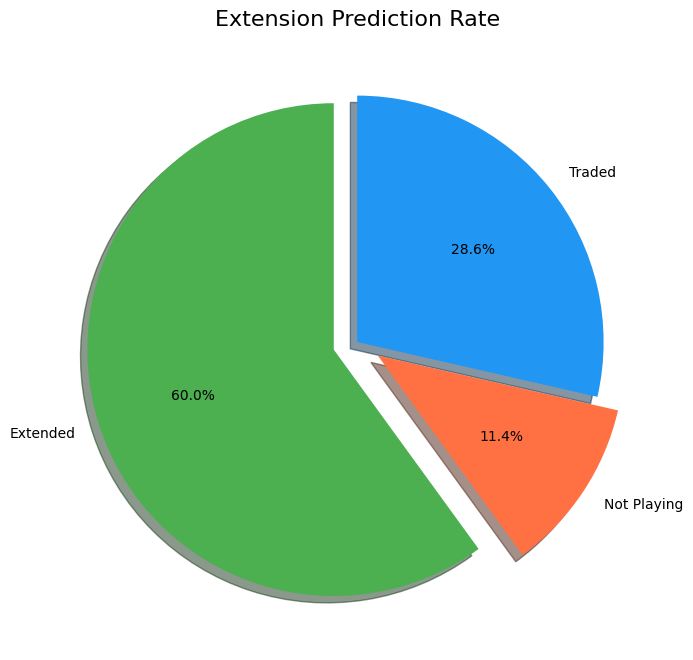

In [ ]:
labels = ['Extended', 'Not Playing', 'Traded']
sizes = [21, 4, 10]
colors = ['#4caf50', '#ff7043', '#2196f3']
explode = (0.1, 0.1, 0)

# Creating a pie chart to visualize results
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title('Extension Prediction Rate', fontsize=16)
plt.show()


Another benefit of this is as a rookie contract manager, we can choose how stern we want to be. We can hold our rookies to the highest standards and if we get any player info back, that means that player could possibly be a Hall of Famer. We can also want our rookies just to be good role-players and check if we want to extend them, in which case we want to set the threshold lower. We can decide the potency of this model.